In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("Features/Features_20201109.csv")
print(data.head)

<bound method NDFrame.head of         tempRMS_S1  tempRMS_S2   tempZCR_S1    tempZCR_S2  tempCent_S1  \
0         0.094859    0.182528   822.333333    545.666667     0.240655   
1         0.088845    0.087462   912.000000    611.333333    -0.143705   
2         0.092669    0.069153   861.000000    720.666667     0.490924   
3         0.096996    0.072105   792.000000    832.333333     0.926613   
4         0.090164    0.067022   830.666667    999.000000     0.573376   
5         0.092095    0.061067   861.333333    980.666667    -3.166791   
6         0.100100    0.067198   876.333333    843.666667     0.005263   
7         0.103424    0.082434   788.333333    686.000000     0.649789   
8         0.111225    0.086428   628.666667    599.333333     1.062930   
9         0.108735    0.085106   610.000000    563.333333    -1.148964   
10        0.080488    0.076113   912.666667    745.333333     1.124746   
11        0.074950    0.068547  1024.666667    900.333333     0.628710   
12      

In [2]:
column_headers = list(data.columns.values)
print(column_headers)
print(len(column_headers)) 

['tempRMS_S1', 'tempRMS_S2', 'tempZCR_S1', 'tempZCR_S2', 'tempCent_S1', 'tempCent_S2', 'tempSpread_S1', 'tempSpread_S2', 'tempSkew_S1', 'tempSkew_S2', 'tempKurt_S1', 'tempKurt_S2', 'tempabsMAX_S1', 'tempabsMax_S2', 'tempabsMIN_S1', 'tempabsMIN_S2', 'tempCorrSens', 'tempCohSens', 'specCent_S1', 'specCent_S2', 'specCrest_S1', 'specCrest_S2', 'specDec_S1', 'specDec_S2', 'specEntr_S1', 'specEntr_S2', 'specFlat_S1', 'specFlat_S2', 'specFlux_S1', 'specFlux_S2', 'specKurt_S1', 'specKurt_S2', 'specRoll_S1', 'specRoll_S2', 'specSkew_S1', 'specSkew_S2', 'specSlope_S1', 'specSlope_S2', 'specSpread_S1', 'specSpread_S2', 'specabsMAX_S1', 'specabsMAX_S2', 'specfMAX_S1', 'specfMAX_S2']
44


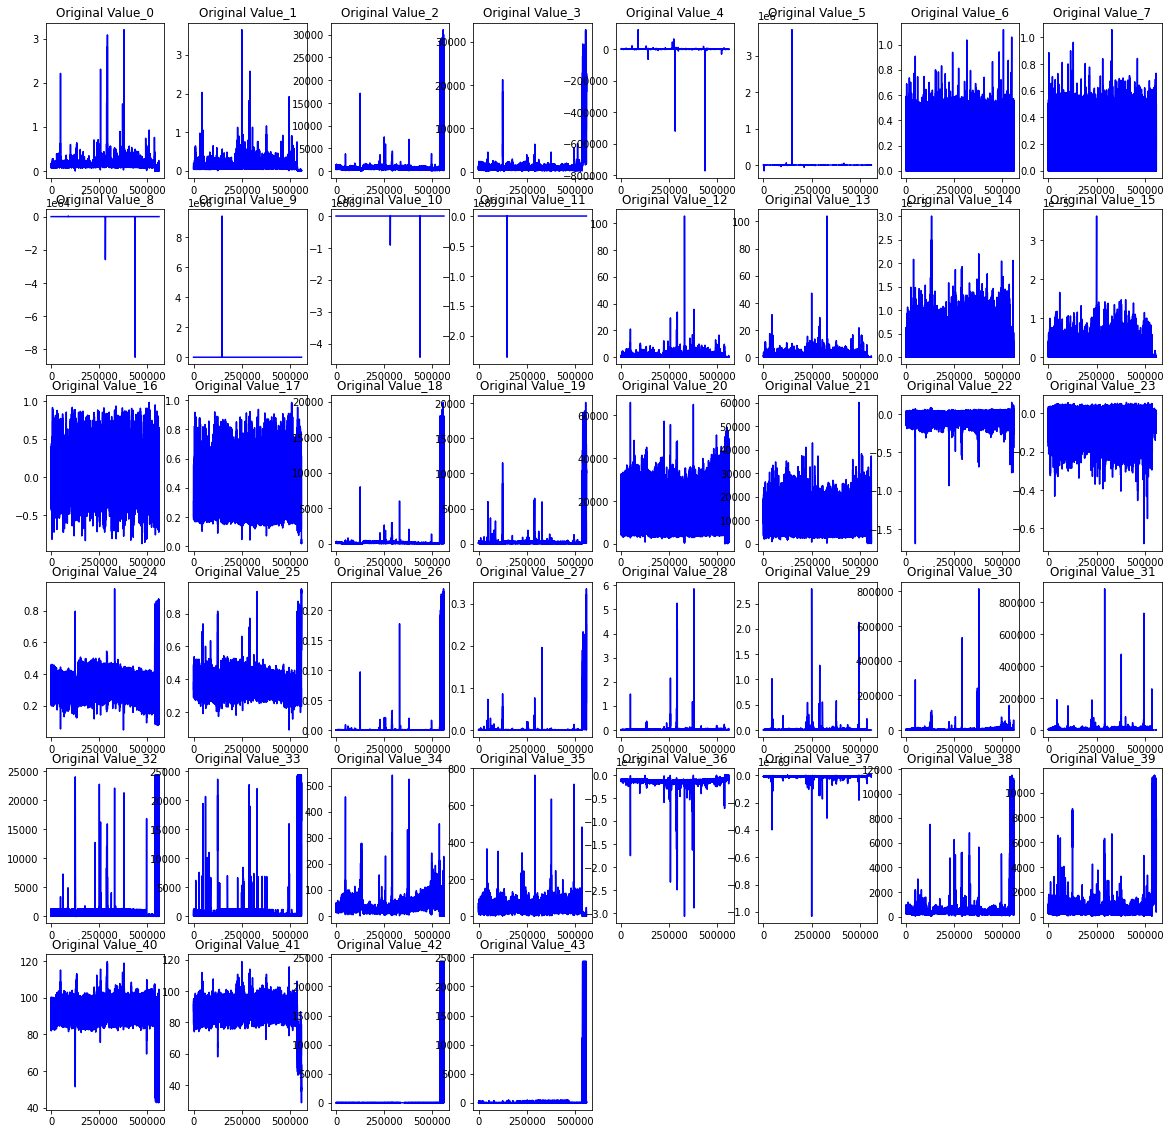

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

for i in range(len(column_headers)):
    plt.subplot(6,8,i+1)
    plt.plot(range(len(data)),data.iloc[:,i],'b')
    plt.title('Original Value_'+str(i))
plt.show()

In [ ]:
# 6，7的数据过于密集，数据差距不大
# 14存在一些小问题
# 16，17数据也像声波
# 20数据能体现出趋势

# 6, 7 data is too dense, the data gap is not big
#14 There are some minor issues
# 16, 17 data is also like sound waves
# 20 data can reflect trends

In [3]:
data_S = data.copy()
for column in data:
    if column.endswith('s'):
        data_S.drop(columns=column, inplace=True)
print(data_S.shape)

(559845, 42)


In [4]:
# Pick one data every 319; 559845/319=1755

begin = 10
data_sample = data_S.iloc[begin:begin+1]

for i in range(1,1755):
    df_cache = data_S.iloc[begin+i*319:begin+i*319+1]
    data_sample = pd.concat([data_sample,df_cache])

print(data_sample.shape)

(1755, 42)


In [5]:
len(list(data_sample.columns.values))

42

In [6]:
# compare the correlation of the data
# 0.8<=|r|<1: high correlation; 0.3<=|r|<0.8: middle correlation

d = data_sample.corr()
#print(d)
x = np.array(d)

i,j = 0,0
len_s = len(list(data_sample.columns.values))
del_list = []
for i in range(len_s):
    for j in range(i+1,len_s):
        if abs(data_sample.iloc[:,i].corr(data_sample.iloc[:,j])) > 0.6:
            del_list.append(j)
        
print(del_list)  

[12, 34, 38, 39, 13, 27, 35, 39, 3, 16, 17, 22, 23, 24, 25, 30, 31, 36, 37, 38, 39, 16, 17, 22, 23, 24, 25, 30, 31, 36, 37, 38, 39, 8, 10, 9, 11, 10, 11, 34, 27, 35, 17, 22, 23, 24, 25, 30, 31, 36, 37, 38, 39, 40, 22, 23, 24, 25, 30, 31, 36, 37, 38, 39, 40, 41, 22, 26, 23, 24, 25, 30, 31, 36, 37, 38, 24, 25, 30, 31, 36, 37, 38, 39, 25, 30, 31, 36, 37, 38, 39, 30, 31, 36, 37, 38, 39, 35, 32, 33, 31, 36, 37, 38, 39, 36, 37, 38, 39, 39, 38, 39, 37, 38, 39, 38, 39, 39, 41]


In [7]:
from collections import Counter
result = Counter(del_list).most_common(27)
result = np.array(result)
# print(result)
print(result[:,0])

del_arr = sorted(result[:,0])
print(del_arr)

data_S0 = data_sample.copy()
data_S0.drop(data_S0.columns[del_arr], axis=1, inplace=True)
print(data_S0.shape)

[39 38 37 36 31 30 25 24 22 23 35 17 34 27 16 10 11 40 41 12 13  3  8  9
 26 32 33]
[3, 8, 9, 10, 11, 12, 13, 16, 17, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
(1755, 15)


In [8]:
column_headers0 = list(data_S0.columns.values)
print(column_headers0)
print(len(column_headers0))

['tempRMS_S1', 'tempRMS_S2', 'tempZCR_S1', 'tempCent_S1', 'tempCent_S2', 'tempSpread_S1', 'tempSpread_S2', 'tempabsMIN_S1', 'tempabsMIN_S2', 'specCrest_S1', 'specCrest_S2', 'specDec_S1', 'specDec_S2', 'specKurt_S1', 'specKurt_S2']
15


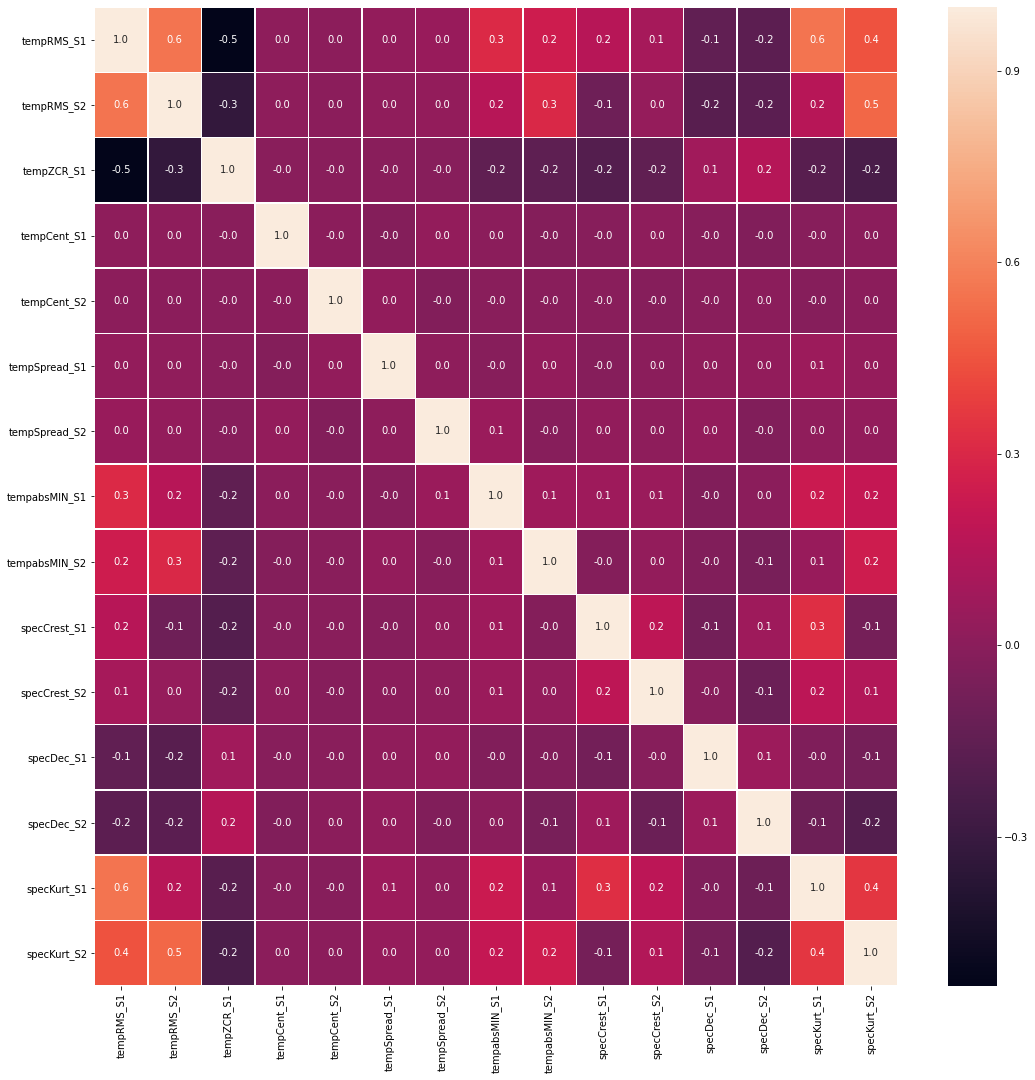

In [10]:
# data visualization
# correlation map
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize=(18, 18))

sns.heatmap(data_S0.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

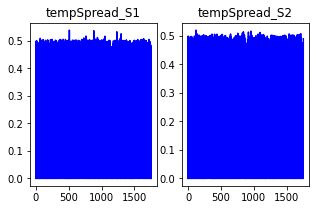

In [24]:
plt.figure(figsize=(5, 3))

for i in range(5,7):
    plt.subplot(1,2,i-4)
    plt.plot(range(len(data_S0)),data_S0.iloc[:,i],'b')
    #plt.title('Original Value_'+str(i))
    plt.title(column_headers0[i])
plt.show()

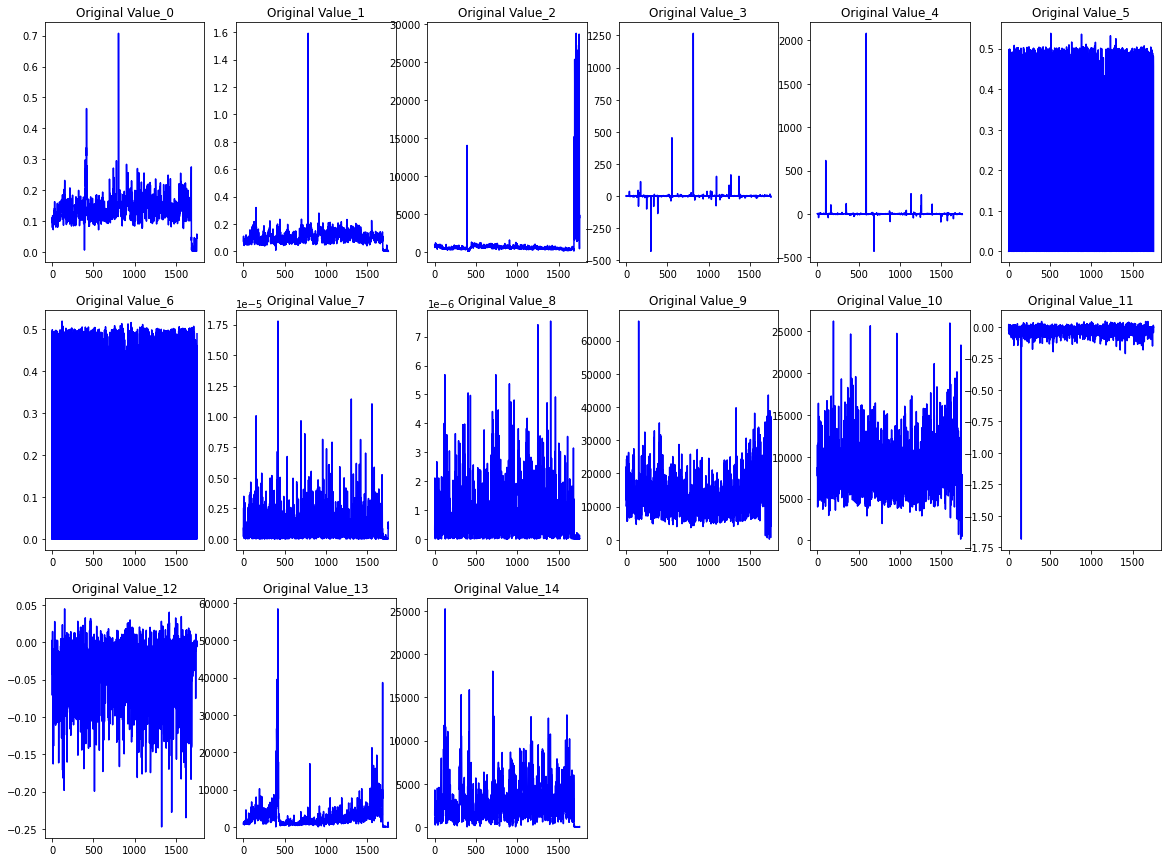

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

for i in range(len(column_headers0)):
    plt.subplot(3,6,i+1)
    plt.plot(range(len(data_S0)),data_S0.iloc[:,i],'b')
    plt.title('Original Value_'+str(i))
plt.show()

In [11]:
# according to the map, add drop list

drop_list = [5,6]

data_S1 = data_S0.copy()
data_S1.drop(data_S1.columns[drop_list], axis=1, inplace=True)

print(data_S1.shape)

(1755, 13)


In [12]:
column_headers1 = list(data_S1.columns.values)
print(column_headers1)
print(len(column_headers1))

['tempRMS_S1', 'tempRMS_S2', 'tempZCR_S1', 'tempCent_S1', 'tempCent_S2', 'tempabsMIN_S1', 'tempabsMIN_S2', 'specCrest_S1', 'specCrest_S2', 'specDec_S1', 'specDec_S2', 'specKurt_S1', 'specKurt_S2']
13


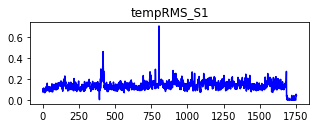

In [18]:
plt.figure(figsize=(5, 1.5))
plt.plot(range(len(data_S1)),data_S1.iloc[:,0],'b')
plt.title(column_headers1[0])
plt.show()

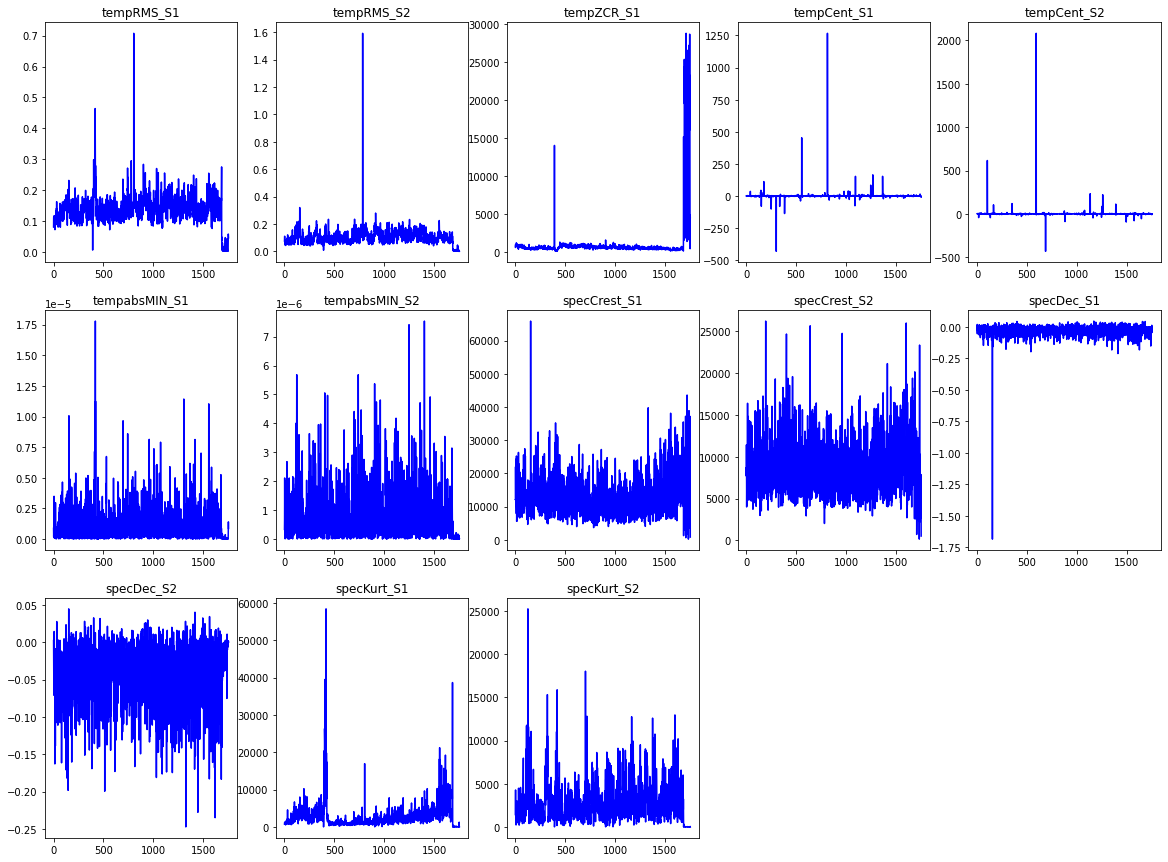

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

for i in range(len(column_headers1)):
    plt.subplot(3,5,i+1)
    plt.plot(range(len(data_S1)),data_S1.iloc[:,i],'b')
    #plt.title('Original Value_'+str(i))
    plt.title(column_headers1[i])
plt.show()

In [7]:
# # data split
# train_data_concat = data_S0.iloc[0:20000,:]
# test_data_concat = data_S0.iloc[20000:30000,:]

# for k in range(13):
#     train_data_concat = pd.concat([train_data_concat ,data_S0.iloc[(30000+k*40000):(60000+k*40000),:]])
#     test_data_concat = pd.concat([test_data_concat ,data_S0.iloc[(60000+k*40000):(70000+k*40000),:]])

# train_data_concat = pd.concat([train_data_concat ,data_S0.iloc[550000:,:]])

# print(train_data_concat.shape)
# print(test_data_concat.shape)

(419845, 17)
(140000, 17)


In [8]:
# from sklearn.preprocessing import MinMaxScaler
# # from sklearn.preprocessing import StandardScaler

# # scalers = StandardScaler()
# mms = MinMaxScaler(feature_range=(-1, 1))
# train_data_scaled = mms.fit_transform(train_data_concat)
# test_data_scaled = mms.transform(test_data_concat)

# print(train_data_scaled.shape)
# print(test_data_scaled.shape)

(419845, 17)
(140000, 17)


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_S1_scaled = scaler.fit_transform(data_S1)
print(data_S1_scaled.shape)


pca = PCA(n_components=10)      #'mle': Automatically select the number of features
pca_train_data = pca.fit_transform(data_S1_scaled)
print(pca_train_data.shape)
print(pca.explained_variance_ratio_)

(1755, 13)
(1755, 10)
[0.23035686 0.11014015 0.08255235 0.0789062  0.07664501 0.07627441
 0.07062564 0.065439   0.06156088 0.05730247]


In [26]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# scalers = StandardScaler()
mms = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = mms.fit_transform(pca_train_data)
print(train_data_scaled.shape)

(1755, 10)


In [9]:
# from sklearn.preprocessing import MinMaxScaler
# # from sklearn.preprocessing import StandardScaler

# # scalers = StandardScaler()
# mm_s = MinMaxScaler(feature_range=(-1, 1))
# all_data_scaled = mm_s.fit_transform(data)


# print(all_data_scaled.shape)

(559845, 44)


In [27]:
len(train_data_scaled)

1755

In [28]:
# AutoEncoder
from keras.datasets import mnist
from keras.models import Model # Generic model
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping

x_train = train_data_scaled
# x_test = test_data_scaled


# compress feature dimensions to 2 dimensions
# 3 dimensions
encoding_dim = 3
 
# this is our input placeholder
input_seq = Input(shape=(10,))
 
# encoding layer
encoded = Dense(8, activation='relu')(input_seq)
# encoded = Dense(16, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)
 
# decoding layer
decoded = Dense(8, activation='relu')(encoder_output)
# decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(10, activation='tanh')(decoded)
 
# Build a self-encoding model
autoencoder = Model(inputs=input_seq, outputs=decoded)
 
# Build a coding model
encoder = Model(inputs=input_seq, outputs=encoder_output)
 
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())
print(encoder.summary())
 
# training
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=50, min_delta=0.0001)
autoencoder.fit(x_train, x_train, epochs=500, batch_size=64, shuffle=True, verbose=2, callbacks=[es])
 

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                90        
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Sha

Epoch 188/500
 - 0s - loss: 0.0015
Epoch 189/500
 - 0s - loss: 0.0015
Epoch 190/500
 - 0s - loss: 0.0015
Epoch 191/500
 - 0s - loss: 0.0015
Epoch 192/500
 - 0s - loss: 0.0015
Epoch 193/500
 - 0s - loss: 0.0015
Epoch 194/500
 - 0s - loss: 0.0015
Epoch 195/500
 - 0s - loss: 0.0015
Epoch 196/500
 - 0s - loss: 0.0015
Epoch 197/500
 - 0s - loss: 0.0015
Epoch 198/500
 - 0s - loss: 0.0015
Epoch 199/500
 - 0s - loss: 0.0014
Epoch 200/500
 - 0s - loss: 0.0014
Epoch 201/500
 - 0s - loss: 0.0014
Epoch 202/500
 - 0s - loss: 0.0014
Epoch 203/500
 - 0s - loss: 0.0014
Epoch 204/500
 - 0s - loss: 0.0014
Epoch 205/500
 - 0s - loss: 0.0014
Epoch 206/500
 - 0s - loss: 0.0014
Epoch 207/500
 - 0s - loss: 0.0014
Epoch 208/500
 - 0s - loss: 0.0014
Epoch 209/500
 - 0s - loss: 0.0014
Epoch 210/500
 - 0s - loss: 0.0014
Epoch 211/500
 - 0s - loss: 0.0014
Epoch 212/500
 - 0s - loss: 0.0014
Epoch 213/500
 - 0s - loss: 0.0014
Epoch 214/500
 - 0s - loss: 0.0014
Epoch 215/500
 - 0s - loss: 0.0014
Epoch 216/500
 - 0s 

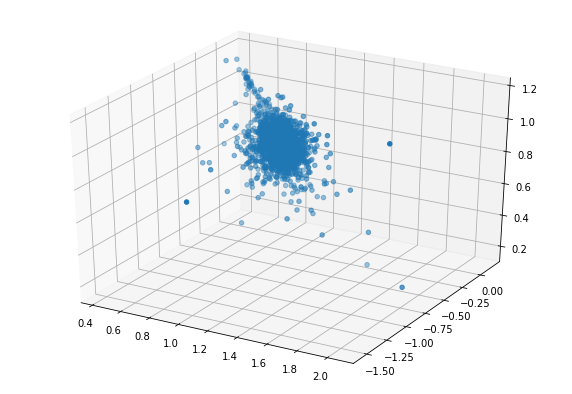

In [39]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

encoded_seq = encoder.predict(x_train)

fig = plt.figure(figsize=(10, 7))
ax1 = plt.axes(projection='3d')
#ax = fig.add_subplot(111,projection='3d')  #more subplot
ax1.scatter3D(encoded_seq[:, 0], encoded_seq[:, 1], encoded_seq[:, 2], s=20)  
plt.show()

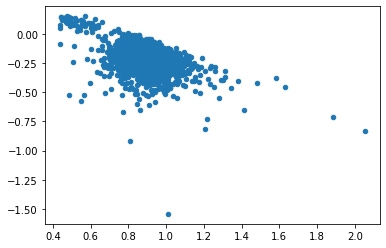

In [29]:
import matplotlib.pyplot as plt

# plotting
encoded_seq = encoder.predict(x_train)
plt.scatter(encoded_seq[:, 0], encoded_seq[:, 1], s=20)  #s:size of points
#plt.colorbar()
plt.show()

In [69]:
np.save("encoded_seq.npy",encoded_seq)

In [1]:
import pandas as pd
import numpy as np

encoded_seq = np.load("encoded_seq.npy")

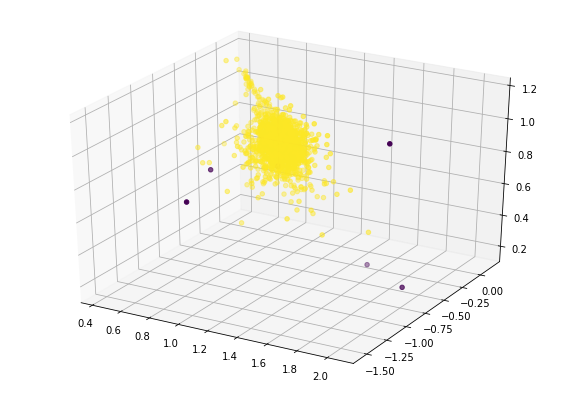

In [43]:
# DBSCAN -  use t-SNE to plot
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

y_pred = DBSCAN(eps = 0.3, min_samples = 5).fit_predict(encoded_seq) 
# eps = 0.4,min_samples = 2
# default: eps = 0.5, min_samples = 5
# plt.scatter(encoded_seq[:, 0], encoded_seq[:, 1], c=y_pred)
# plt.colorbar()
# plt.show()

fig = plt.figure(figsize=(10, 7))
ax1 = plt.axes(projection='3d')
#ax = fig.add_subplot(111,projection='3d')  #more subplot
ax1.scatter3D(encoded_seq[:, 0], encoded_seq[:, 1], encoded_seq[:, 2], c=y_pred)
plt.show()

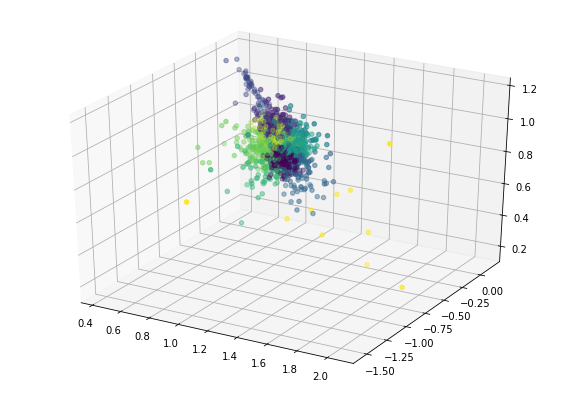

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Num_cluster = 10

y_pred = KMeans(n_clusters=Num_cluster, random_state=9).fit_predict(encoded_seq)
# plt.scatter(encoded_seq[:, 0], encoded_seq[:, 1], c=y_pred)
# plt.colorbar()
# plt.show()

fig = plt.figure(figsize=(10, 7))
ax1 = plt.axes(projection='3d')
#ax = fig.add_subplot(111,projection='3d')  #more subplot
ax1.scatter3D(encoded_seq[:, 0], encoded_seq[:, 1], encoded_seq[:, 2], c=y_pred)
plt.show()

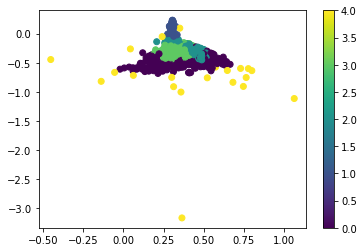

In [73]:
# GMM 
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

Num_components = 5

gmm = GaussianMixture(n_components=Num_components, covariance_type='full', random_state=0)
gmm.fit(encoded_seq)
y_pred = gmm.predict(encoded_seq)
plt.scatter(encoded_seq[:, 0], encoded_seq[:, 1], c=y_pred)
plt.colorbar()
plt.show()

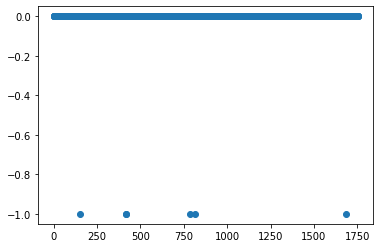

[48817, 133033, 133671, 250106, 259676, 537525]


In [31]:
import matplotlib.pyplot as plt

plt.scatter(range(encoded_seq.shape[0]), y_pred)
plt.show()

err_list = []
for k in range(len(y_pred)):
    if y_pred[k] != 0:
        err_list.append(begin+319*k)

print(err_list)

In [81]:
# read the corresponding date
data_date = pd.read_csv("Features/Features_timestamp_20201109.csv")

err_date = []
for i in err_list:
    err_date.append(data_date.iloc[i,0])
print('The error dates are:', err_date)    

The error dates are: ['2019-Dec-25_13:18:41', '2020-Jan-11_01:18:41', '2020-Feb-02_23:48:16', '2020-Feb-04_20:48:16', '2020-Mar-22_03:26:27']


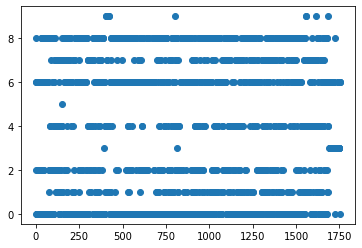

In [4]:
import matplotlib.pyplot as plt

plt.scatter(range(encoded_seq.shape[0]), y_pred)
plt.show()

In [5]:
dataframe = pd.DataFrame({'index_name':y_pred})
dataframe.to_csv("index_new.csv",index=False,sep=',')

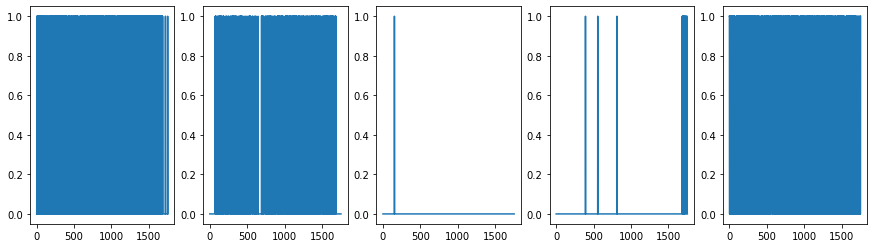

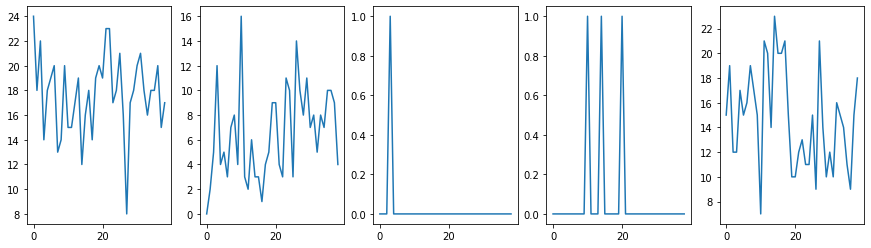

In [49]:
# plot the frequency
idx = y_pred
idx_val = np.zeros((5,len(idx)))
for ii in range(len(idx)):
    if idx[ii] == 0:
        idx_val[0,ii] = 1
    elif idx[ii] == 1:
        idx_val[1,ii] = 1
    elif idx[ii] == 2:
        idx_val[2,ii] = 1
    elif idx[ii] == 3:
        idx_val[3,ii] = 1
    elif idx[ii] == 4:
        idx_val[4,ii] = 1


idx_num = np.zeros((5,int(len(idx)/45)))
# 1755 = 3*3*3*5*13
for kk in range(int(len(idx)/45)):
    idx_num[0,kk] = np.sum(idx_val[0,kk*39:(kk+1)*39] == 1)
    idx_num[1,kk] = np.sum(idx_val[1,kk*39:(kk+1)*39] == 1)
    idx_num[2,kk] = np.sum(idx_val[2,kk*39:(kk+1)*39] == 1)
    idx_num[3,kk] = np.sum(idx_val[3,kk*39:(kk+1)*39] == 1)
    idx_num[4,kk] = np.sum(idx_val[4,kk*39:(kk+1)*39] == 1)


plt.figure(figsize=(15, 4))
for jj in range(5):
    plt.subplot(1,5,jj+1)
    plt.plot(range(len(idx_val[jj,:])),idx_val[jj,:])
plt.show()    

plt.figure(figsize=(15, 4))
for jj in range(5):
    plt.subplot(1,5,jj+1)
    plt.plot(range(len(idx_num[jj,:])),idx_num[jj,:])
plt.show()

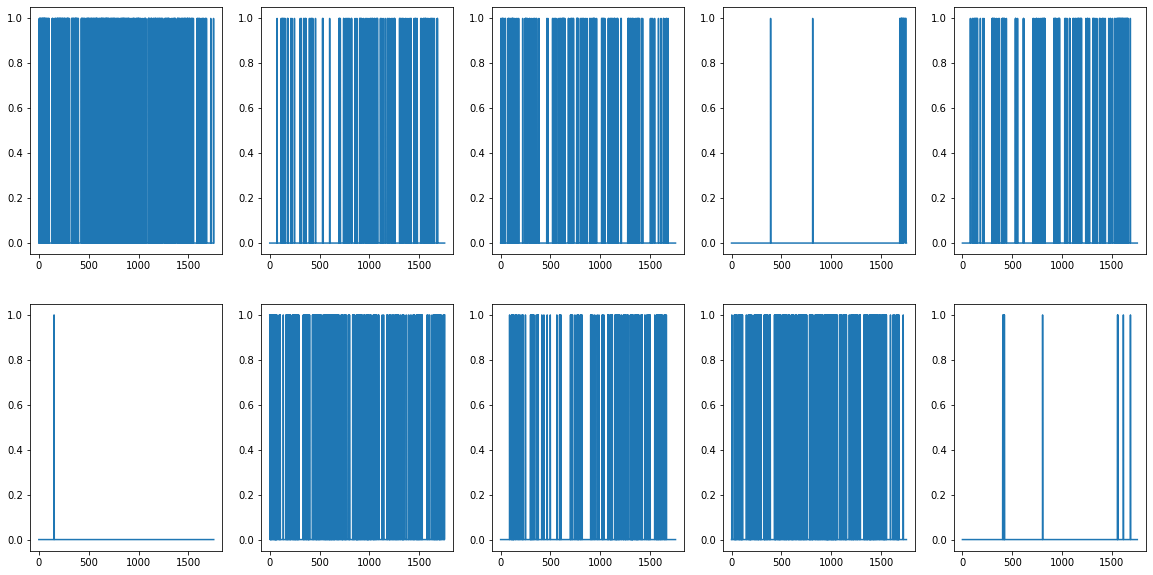

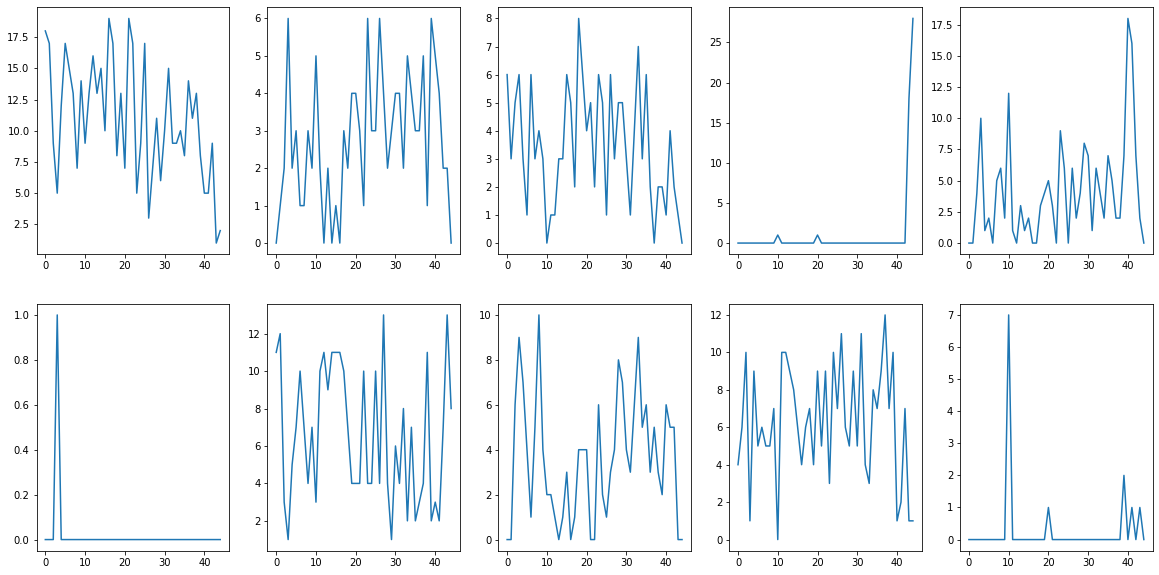

In [8]:
# plot the frequency
idx = y_pred
idx_val = np.zeros((10,len(idx)))
for ii in range(len(idx)):
    if idx[ii] == 0:
        idx_val[0,ii] = 1
    elif idx[ii] == 1:
        idx_val[1,ii] = 1
    elif idx[ii] == 2:
        idx_val[2,ii] = 1
    elif idx[ii] == 3:
        idx_val[3,ii] = 1
    elif idx[ii] == 4:
        idx_val[4,ii] = 1
    elif idx[ii] == 5:
        idx_val[5,ii] = 1
    elif idx[ii] == 6:
        idx_val[6,ii] = 1
    elif idx[ii] == 7:
        idx_val[7,ii] = 1
    elif idx[ii] == 8:
        idx_val[8,ii] = 1
    elif idx[ii] == 9:
        idx_val[9,ii] = 1

idx_num = np.zeros((10,int(len(idx)/39)))
# 1755 = 3*3*3*5*13
# 135
# len(idx)/45 = 39
for kk in range(int(len(idx)/39)):
    idx_num[0,kk] = np.sum(idx_val[0,kk*39:(kk+1)*39] == 1)
    idx_num[1,kk] = np.sum(idx_val[1,kk*39:(kk+1)*39] == 1)
    idx_num[2,kk] = np.sum(idx_val[2,kk*39:(kk+1)*39] == 1)
    idx_num[3,kk] = np.sum(idx_val[3,kk*39:(kk+1)*39] == 1)
    idx_num[4,kk] = np.sum(idx_val[4,kk*39:(kk+1)*39] == 1)
    idx_num[5,kk] = np.sum(idx_val[5,kk*39:(kk+1)*39] == 1)
    idx_num[6,kk] = np.sum(idx_val[6,kk*39:(kk+1)*39] == 1)
    idx_num[7,kk] = np.sum(idx_val[7,kk*39:(kk+1)*39] == 1)
    idx_num[8,kk] = np.sum(idx_val[8,kk*39:(kk+1)*39] == 1)
    idx_num[9,kk] = np.sum(idx_val[9,kk*39:(kk+1)*39] == 1)

plt.figure(figsize=(20, 10))
for jj in range(10):
    plt.subplot(2,5,jj+1)
    plt.plot(range(len(idx_val[jj,:])),idx_val[jj,:])
plt.show()    

plt.figure(figsize=(20, 10))
for jj in range(10):
    plt.subplot(2,5,jj+1)
    plt.plot(range(len(idx_num[jj,:])),idx_num[jj,:])
plt.show()